In [0]:
pip install pylDavis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 17.2MB/s 
  Created wheel for pylDavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c9a83e0fcc307a52706dc56193f1a0be34077cf70d3addf7c7e3efd0b12c4bcb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=2721a1fe4aa305b42a10839247bcb3e10a7d644993cc646dfe27992bcfe8c268
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pylDavis funcy


Function To Print the frequent terms in the Transcript


In [0]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
df=pd.read_csv('/content/Youtube_Data_Last20 (1).csv')

Printitng the Word counts before Preprocessing

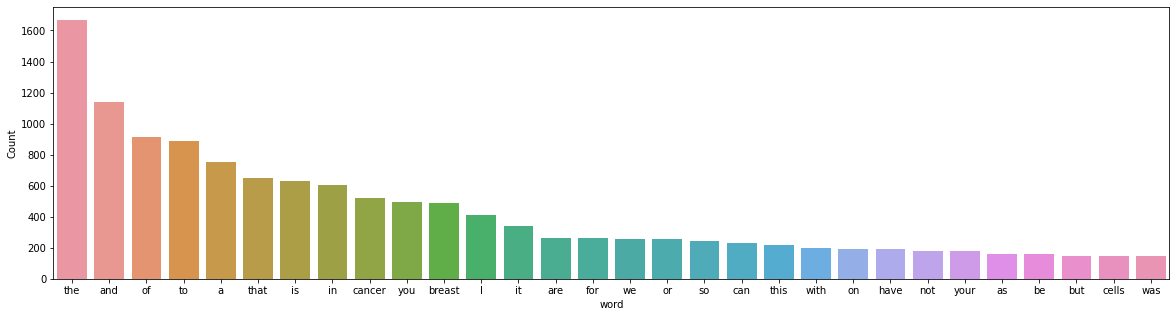

In [0]:
freq_words(df['Transcript'])

In [0]:
# remove unwanted characters, numbers and symbols
df['Transcript'] = df['Transcript'].str.replace("[^a-zA-Z#]", " ")

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [0]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['Transcript'] = df['Transcript'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
Transcript = [remove_stopwords(r.split()) for r in df['Transcript']]

# make entire text lowercase
Transcript = [r.lower() for r in Transcript]

Freq Dist after removing Stopwords

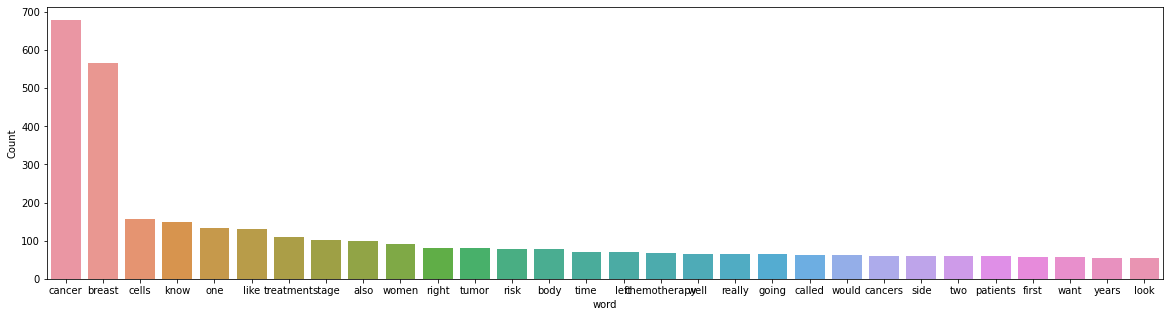

In [0]:
freq_words(Transcript,30)

In [0]:
!python -m spacy download en # one time run

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Function for Lemmatization

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [0]:
##Tokenizing the scripts
tokenized_transcript = pd.Series(Transcript).apply(lambda x: x.split())
print(tokenized_transcript[1])
##Lemmatization
transcript_2 = lemmatization(tokenized_transcript)
print(transcript_2[1]) # print lemmatized review

['doctors', 'shock', 'kills', 'colon', 'cancer', 'two', 'days', 'unfortunately', 'colon', 'cancer', 'one', 'common', 'cancer', 'types', 'men', 'women', 'terrible', 'disease', 'takes', 'millions', 'lives', 'around', 'world', 'wait', 'good', 'news', 'group', 'experts', 'found', 'powerful', 'ingredient', 'kill', 'colon', 'cancer', 'cells', 'days', 'amazing', 'right', 'probably', 'ask', 'name', 'secret', 'ingredient', 'well', 'answer', 'question', 'talking', 'super', 'healthy', 'coconut', 'oil', 'recent', 'study', 'conducted', 'group', 'researchers', 'adelaide', 'university', 'australia', 'discovered', 'lauric', 'acid', 'found', 'coconut', 'oil', 'eliminates', 'almost', 'colon', 'cancer', 'cells', 'two', 'days', 'treatment', 'coconut', 'oil', 'contains', 'high', 'amounts', 'lauric', 'acid', 'well', 'almost', 'half', 'content', 'coconut', 'oil', 'according', 'experts', 'lauric', 'acid', 'contaminates', 'cancer', 'cells', 'releasing', 'intense', 'oxidative', 'stress', 'process', 'lauric', 'a

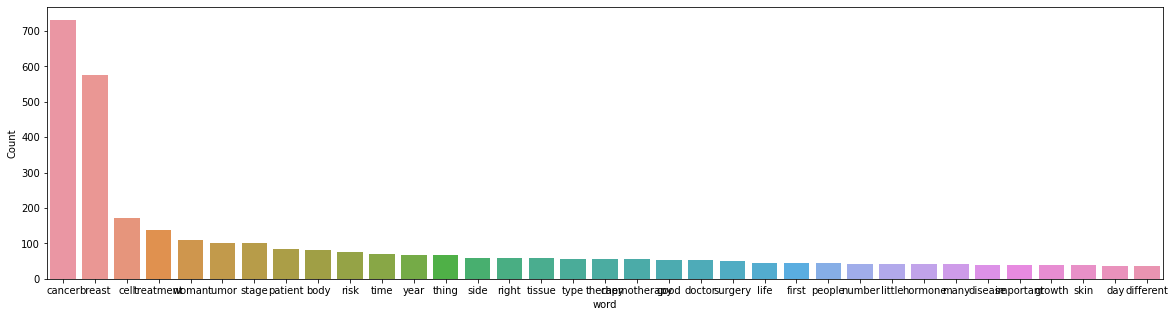

In [0]:
transcript_3 = []
for i in range(len(transcript_2)):
    transcript_3.append(' '.join(transcript_2[i]))

df['Transcript'] = transcript_3

freq_words(df['Transcript'], 35)

Building the Model


In [0]:
dictionary = corpora.Dictionary(transcript_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in transcript_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [0]:
lda_model.print_topics()

[(0,
  '0.102*"cancer" + 0.088*"breast" + 0.029*"stage" + 0.021*"woman" + 0.013*"risk" + 0.012*"tumor" + 0.011*"patient" + 0.010*"cell" + 0.009*"lump" + 0.008*"type"'),
 (1,
  '0.014*"cancer" + 0.014*"use" + 0.009*"research" + 0.007*"thing" + 0.007*"vitamin" + 0.007*"lot" + 0.007*"day" + 0.007*"effect" + 0.007*"soy" + 0.007*"salt"'),
 (2,
  '0.012*"discomfort" + 0.012*"surgery" + 0.007*"good" + 0.006*"bra" + 0.006*"ice" + 0.006*"woman" + 0.005*"little" + 0.004*"activity" + 0.004*"idea" + 0.004*"supportive"'),
 (3,
  '0.050*"cancer" + 0.036*"breast" + 0.021*"treatment" + 0.014*"cell" + 0.014*"patient" + 0.010*"right" + 0.009*"side" + 0.008*"category" + 0.008*"body" + 0.008*"therapy"'),
 (4,
  '0.063*"cancer" + 0.050*"breast" + 0.024*"cell" + 0.012*"tissue" + 0.011*"tumor" + 0.008*"risk" + 0.007*"woman" + 0.007*"skin" + 0.006*"time" + 0.006*"thing"'),
 (5,
  '0.017*"cancer" + 0.014*"breast" + 0.013*"people" + 0.012*"thing" + 0.009*"time" + 0.007*"woman" + 0.007*"number" + 0.007*"life" + 

Visualize using pyLDAvis

In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.076466 -0.063662       1        1  30.965900
4      0.117389  0.131946       2        1  30.175268
0      0.158635 -0.053368       3        1  18.991302
5     -0.094790  0.013732       4        1   8.293285
6     -0.058547 -0.090446       5        1   6.067956
1     -0.099904  0.023846       6        1   4.492321
2     -0.099248  0.037951       7        1   1.013961, topic_info=          Term        Freq       Total Category  logprob  loglift
259  treatment  113.000000  113.000000  Default  30.0000  30.0000
27      breast  498.000000  498.000000  Default  29.0000  29.0000
31      cancer  631.000000  631.000000  Default  28.0000  28.0000
227      stage   84.000000   84.000000  Default  27.0000  27.0000
238    surgery   39.000000   39.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
783  important    0.424422   34.618484   Topic7  -5.5829   0.1899
249      thing    0.442158   53.017849   Topic7  -5.5420  -0.1954
259  treatment    0.360010  113.795181   Topic7  -5.7475  -1.1647
27      breast    0.306491  498.220947   Topic7  -5.9085  -2.8023
901     reason    0.261242    5.146976   Topic7  -6.0682   1.6106

[474 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
572       5  0.755515    abdoman
1995      2  0.349647    ability
1995      5  0.349647    ability
2287      5  0.509241   accident
463       3  0.933652     action
...     ...       ...        ...
275       6  0.036043       year
1609      4  0.953396    youknow
983       3  0.984551      young
1954      3  0.842091  yourright
1613      4  0.953396    youwant

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 6, 7, 2, 3])

Identifying the dominant Topics in each videos


In [0]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=Transcript)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(40)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9986,"cancer, breast, cell, tissue, tumor, risk, woman, skin, time, thing",learning medicine hard work osmosis makes easy takes lectures notes create personalized study plan exclusive videos practice questions flashcards much try free today breast cancer breast carcinoma...
1,1,3.0,0.9952,"cancer, breast, treatment, cell, patient, right, side, category, body, therapy",doctors shock kills colon cancer two days unfortunately colon cancer one common cancer types men women terrible disease takes millions lives around world wait good news group experts found powerfu...
2,2,3.0,0.9879,"cancer, breast, treatment, cell, patient, right, side, category, body, therapy",miller tasty way fight cancer next time waiter armed giant pepper mill asked whether like fresh ground salad say yes please recent lab study ingredient responsible peppers pungent zing called pip ...
3,3,5.0,0.9936,"cancer, breast, people, thing, time, woman, number, life, day, good",darling vertical garden logo shop found heart yeah god herbs lemongrass use also cure cancer bail good mosquitoes good antibiotic sweet basil oregano another antibiotic got call good brain help li...
4,4,0.0,0.9931,"cancer, breast, stage, woman, risk, tumor, patient, cell, lump, type",taking action health next several weeks going take look ways improve well new procedures may give better quality life week looking breakthroughs breast cancer drug cocktail called miracle women ag...
5,5,4.0,0.5890,"cancer, breast, cell, tissue, tumor, risk, woman, skin, time, thing",wayne higgins girlfriend heather dated four years finally popped question set date started planning big day one thing failed consider wayne worked postal worker lost weight developed persistent co...
6,6,6.0,0.9928,"treatment, week, cancer, chemotherapy, year, lot, time, doctor, people, prayer",went one doctor hear biopsy reports said rare aggressive virtually data time marilee costs knew pain lower abdomen meant something wrong sitting doctor office year old grandmother learned worse im...
7,7,5.0,0.7577,"cancer, breast, people, thing, time, woman, number, life, day, good",year removed diagnosis long year bin long felt respects felt wrong respects gone really really fast hmm october fourteenth day said day think day like coming couple weeks think hard day get kind d...
8,8,4.0,0.9983,"cancer, breast, cell, tissue, tumor, risk, woman, skin, time, thing",learning medicine hard work osmosismakes easy takes lectures andnotes create personalized studyplan exclusive videos practicequestions flashcards muchmore try free todaybreast cancer breast carcin...
9,9,4.0,0.9937,"cancer, breast, cell, tissue, tumor, risk, woman, skin, time, thing",rachel freedman medical oncologist breast oncology center dana farber cancer institute also medical director dana farber cancer care collaborative network hospitals throughout new england breast c...


Identifying the frequent keyword contribution to a Topic

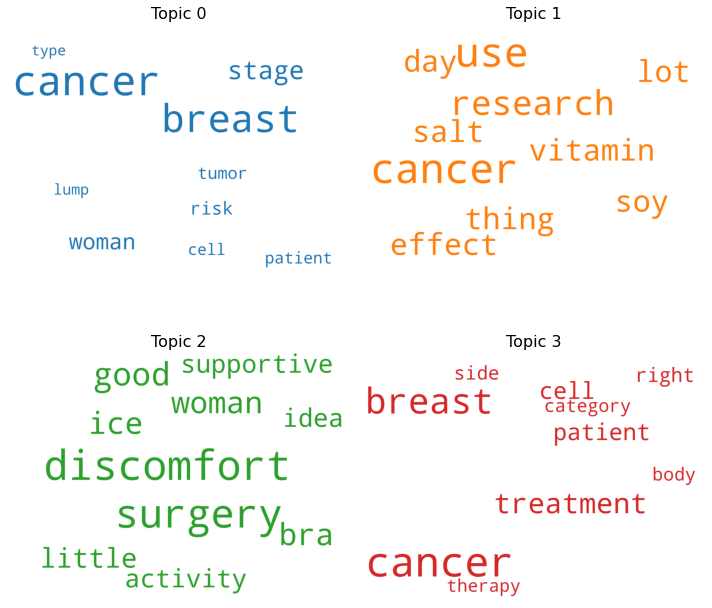

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show(7)